In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./fifa_eda.csv',parse_dates = ['Contract Valid Until'])

In [6]:
df.rename(columns={'Contract Valid Until': 'Contract_Valid_Until'}, inplace=True)

In [98]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves',
       'Position', 'Joined', 'Contract_Valid_Until', 'Height', 'Weight',
       'Release Clause', 'Year', 'Month', 'Wage_limit'],
      dtype='object')

In [7]:
df['Year']=df.Contract_Valid_Until.dt.year
df['Month']=df.Contract_Valid_Until.dt.month

In [8]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
df.columns

In [ ]:
df

### Is there a correlation between a player's age and their overall rating?

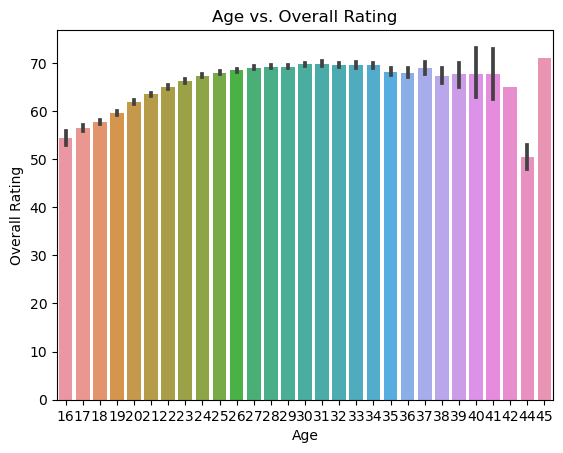

In [9]:
sns.barplot(x='Age', y='Overall', data=df)
plt.title("Age vs. Overall Rating")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


In [10]:
correlation = df['Age'].corr(df['Overall'])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.45234952145633556


### Is there a correlation between a player's age and their potential?

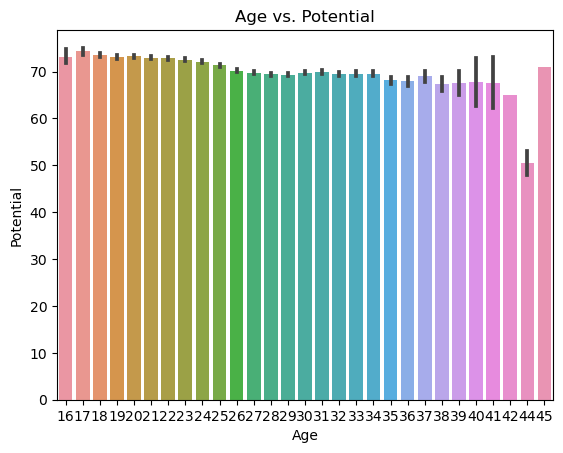

In [11]:
sns.barplot(x='Age', y='Potential', data=df)
plt.title("Age vs. Potential")
plt.xlabel("Age")
plt.ylabel("Potential")
plt.show()


In [12]:
correlation = df['Age'].corr(df['Potential'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.2533121074109557


### Are there any notable differences in the distribution of values and wages between players with different preferred foot (left or right)?

In [ ]:
left_foot_players = df[df['Preferred Foot'] == 'Left']
right_foot_players = df[df['Preferred Foot'] == 'Right']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(left_foot_players['Value'], bins=20, color='blue', label='Left Foot')
sns.histplot(right_foot_players['Value'], bins=20, color='orange', label='Right Foot')
plt.title("Distribution of Value by Preferred Foot")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(left_foot_players['Wage'], bins=20, color='blue', label='Left Foot')
sns.histplot(right_foot_players['Wage'], bins=20, color='orange', label='Right Foot')
plt.title("Distribution of Wage by Preferred Foot")
plt.xlabel("Wage")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df.columns

In [ ]:

left_foot_players = df[df['Preferred Foot'] == 'Left']
right_foot_players = df[df['Preferred Foot'] == 'Right']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(left_foot_players['Value'], bins=20, color='blue', label='Left Foot')
sns.histplot(right_foot_players['Value'], bins=20, color='orange', label='Right Foot')
plt.title("Distribution of Value by Preferred Foot")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(left_foot_players['Wage'], bins=20, color='blue', label='Left Foot')
sns.histplot(right_foot_players['Wage'], bins=20, color='orange', label='Right Foot')
plt.title("Distribution of Wage by Preferred Foot")
plt.xlabel("Wage")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
df.Wage.mean()

9.731312132696216

In [13]:
df['Wage_limit'] = pd.cut(x = df.Wage, bins=[0,20, 50,100, 200,300, 600], labels=['Too Low','Low','Below_Avg','Medium','High', 'Too High'])
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract_Valid_Until,Height,Weight,Release Clause,Year,Month,Wage_limit
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,2021.0,1.0,Too High
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2022.0,1.0,Too High
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,2022.0,1.0,High
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,2020.0,1.0,High
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,2023.0,1.0,Too High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0,2019.0,1.0,Too Low
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0,2020.0,1.0,Too Low
18204,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0,2021.0,1.0,Too Low
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0,2019.0,1.0,Too Low


<Axes: xlabel='Wage'>

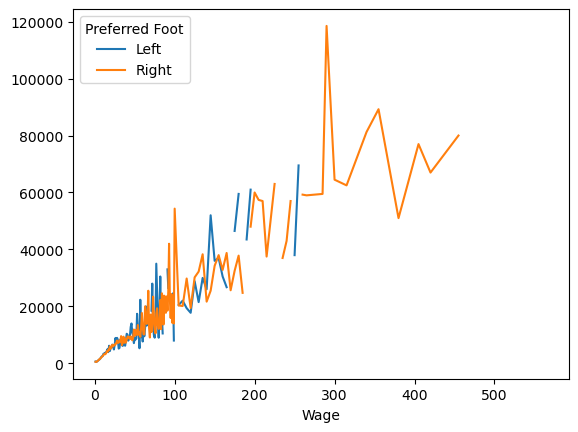

In [72]:
Foot_Wage_Value1 = pd.pivot_table(data=df, values='Value', index='Wage', columns='Preferred Foot')
Foot_Wage_Value1.plot.line()

In [14]:
Foot_Wage_Value = pd.pivot_table(data=df, values='Value', index='Wage_limit', columns='Preferred Foot')
Foot_Wage_Value

Preferred Foot,Left,Right
Wage_limit,,
Too Low,1337.947802,1199.558449
Low,7210.119048,7450.809444
Below_Avg,15411.956522,15291.362126
Medium,29957.142857,28948.113208
High,54000.000000,57225.000000
Too High,80000.000000,74100.000000


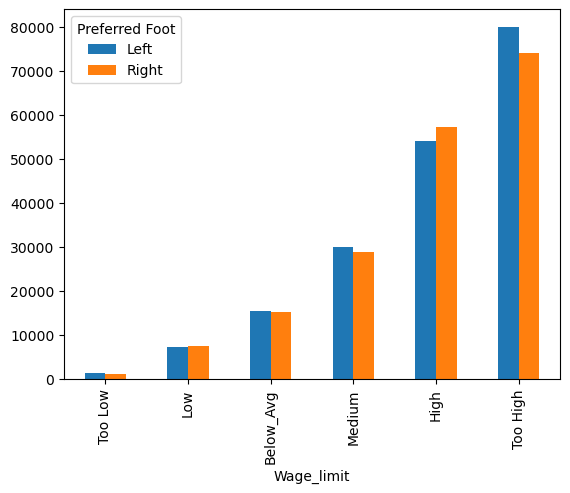

In [15]:
Foot_Wage_Value.plot.bar();

In [ ]:
df1=df[['Value',
       'Wage', 'Preferred Foot']]

In [ ]:
df1

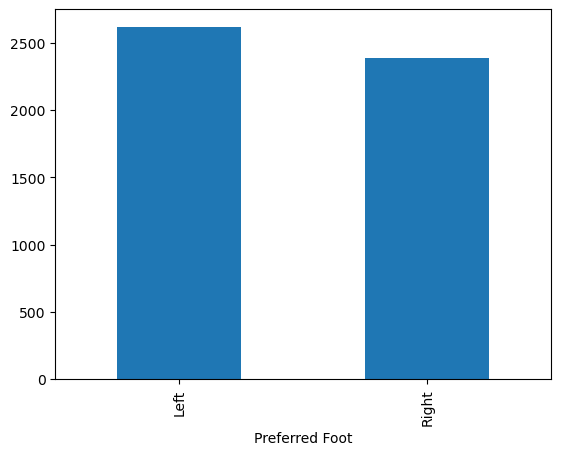

In [16]:
footvsvalue = df.groupby('Preferred Foot')['Value'].mean()
footvsvalue.plot.bar();

<Axes: xlabel='Preferred Foot'>

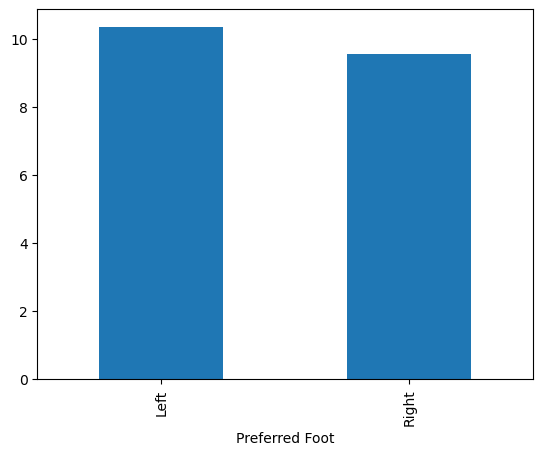

In [17]:
footvswage = df.groupby('Preferred Foot')['Wage'].mean()
footvswage.plot.bar()

In [ ]:
footvsvalue = df.groupby('Preferred Foot')['Value'].mean()

In [ ]:
df2

### Are there any correlations between a player's position and their overall rating or potential?

<Axes: xlabel='Position'>

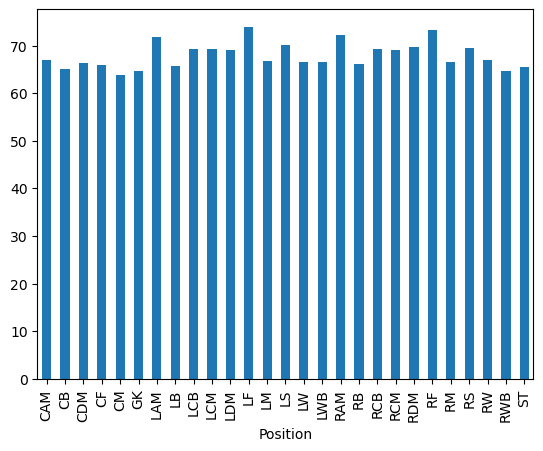

In [18]:
position_rating = df.groupby('Position')['Overall'].mean()
position_potential = df.groupby('Position')['Potential'].mean()
position_rating.plot.bar()


<Axes: xlabel='Position'>

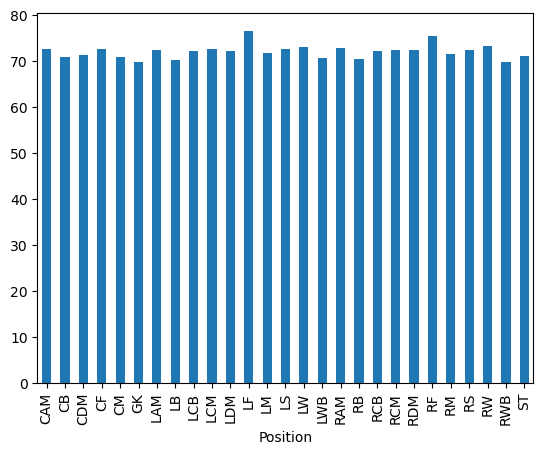

In [19]:
position_potential.plot.bar()

### How does the international recognition correlate with their overall rating?

<Axes: xlabel='International Reputation'>

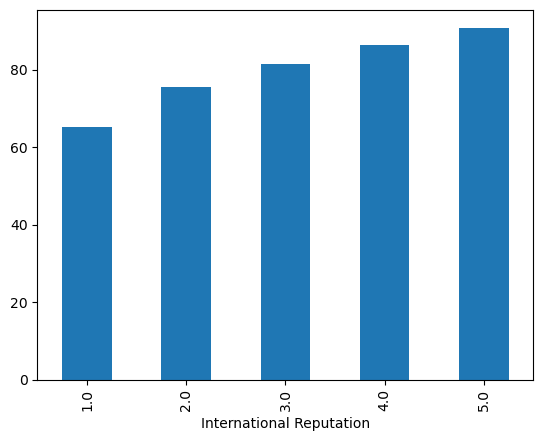

In [20]:
recogvsoverall=df.groupby('International Reputation')['Overall'].mean()
recogvsoverall.plot.bar()

### How does a player's skill moves rating relate to their overall rating?

In [21]:
players_with_international_recognition = df[df['International Reputation'] > 0]

<Axes: xlabel='Skill Moves'>

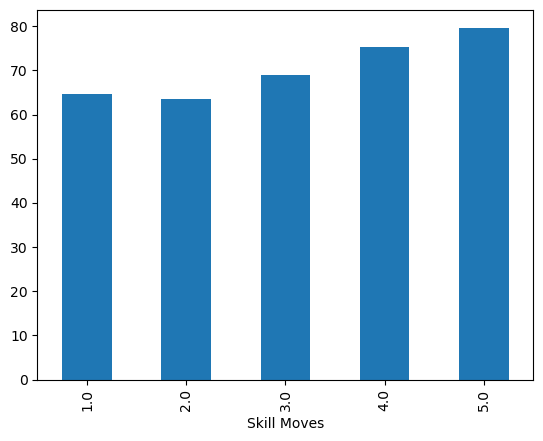

In [22]:
skillvsoverall=df.groupby('Skill Moves')['Overall'].mean()
skillvsoverall.plot.bar()

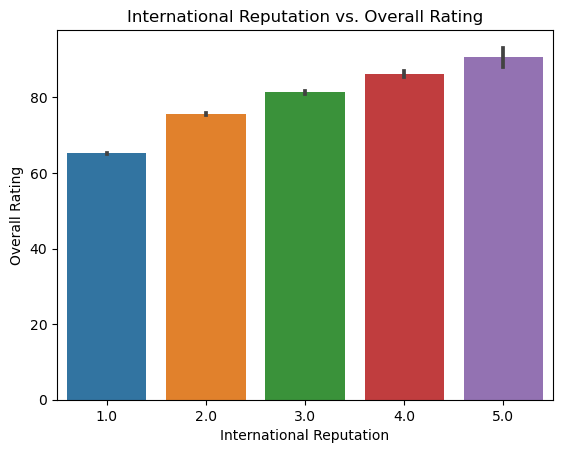

In [24]:
sns.barplot(x='International Reputation', y='Overall', data=players_with_international_recognition)
plt.title("International Reputation vs. Overall Rating")
plt.xlabel("International Reputation")
plt.ylabel("Overall Rating")
plt.show()


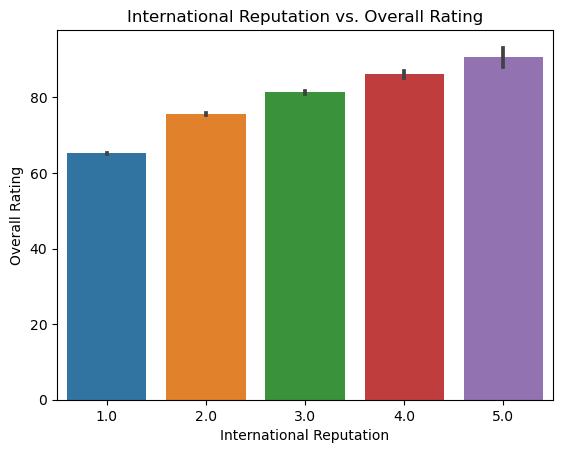

In [26]:
sns.barplot(x='International Reputation', y='Overall', data=players_with_international_recognition)
plt.title("International Reputation vs. Overall Rating")
plt.xlabel("International Reputation")
plt.ylabel("Overall Rating")
plt.show()


In [27]:
correlation = df['Skill Moves'].corr(df['Overall'])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.41446323510267563


### Which club spend the most?

In [28]:
club_spending = df.groupby('Club')['Value'].sum().sort_values(ascending=False)
most_spending_club = club_spending.index[0]
total_spending = club_spending.iloc[0]

print("Club with the most spending:", most_spending_club)
print("Total spending:", total_spending)


Club with the most spending: Real Madrid
Total spending: 874425.0


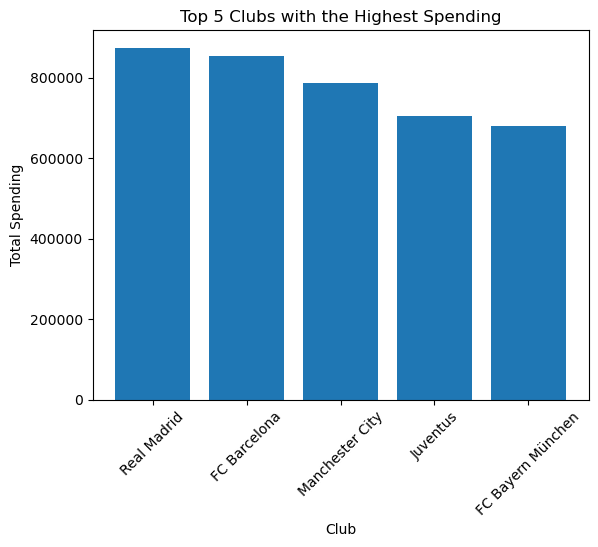

In [29]:
top_5_clubs = club_spending.head(5)

plt.bar(top_5_clubs.index, top_5_clubs.values)
plt.title("Top 5 Clubs with the Highest Spending")
plt.xlabel("Club")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()


### How does a player's contract validity affect their overall rating or value?

In [ ]:
#?????

In [81]:
df.dropna(inplace=True)

In [82]:
df['Year']=df['Year'].astype(int)

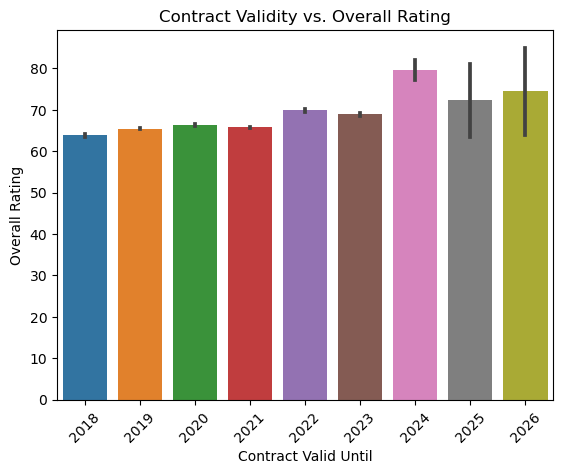

In [83]:
sns.barplot(x=df['Year'], y=df['Overall'])
plt.title("Contract Validity vs. Overall Rating")
plt.xlabel("Contract Valid Until")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()



### Are there any interesting insights related to the heights and weights of the players?

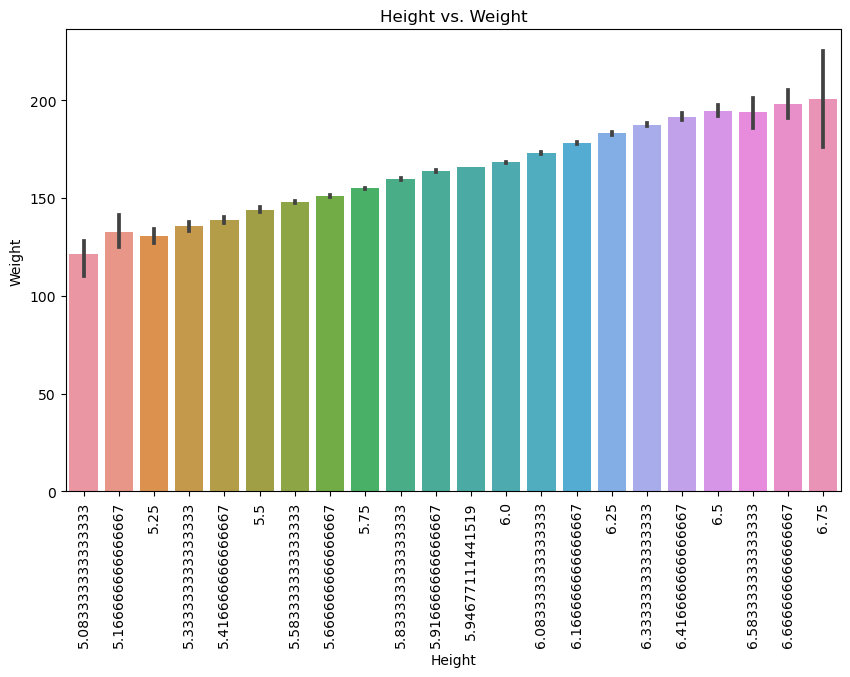

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Height', y='Weight', data=df)
plt.title("Height vs. Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.xticks(rotation=90)
plt.show()


### Which clubs have the highest average overall rating?

In [126]:
club_avg_rating = df.groupby('Club')['Overall'].mean().sort_values(ascending=False)


In [127]:
highest_rated_clubs = club_avg_rating.head(10)

print("Clubs with the Highest Average Overall Rating:")
for club, rating in highest_rated_clubs.items():
    print(club, "-", rating)


Clubs with the Highest Average Overall Rating:
Juventus - 82.28
Napoli - 80.0
Inter - 79.75
Real Madrid - 78.24242424242425
Milan - 78.07407407407408
FC Barcelona - 78.03030303030303
Paris Saint-Germain - 77.43333333333334
Roma - 77.42307692307692
Manchester United - 77.24242424242425
FC Bayern München - 77.0


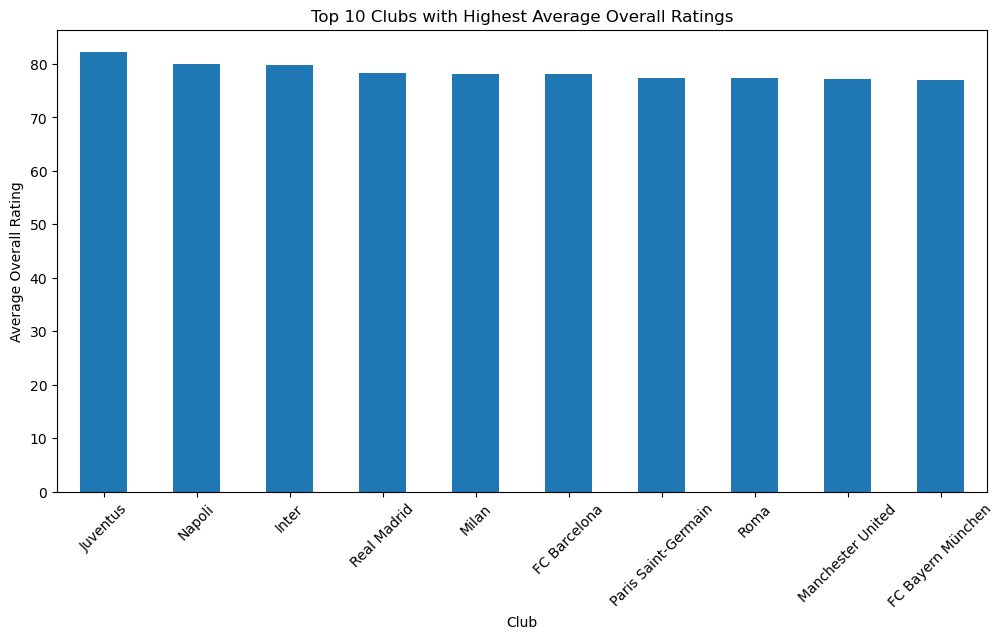

In [128]:
club_avg_rating = df.groupby('Club')['Overall'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
club_avg_rating.head(10).plot(kind='bar')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.title('Top 10 Clubs with Highest Average Overall Ratings')
plt.xticks(rotation=45)
plt.show()


### Which nationalities are the most represented in the dataset?

In [87]:
nationality_counts = df['Nationality'].value_counts()
top_nationalities = nationality_counts.head(5)

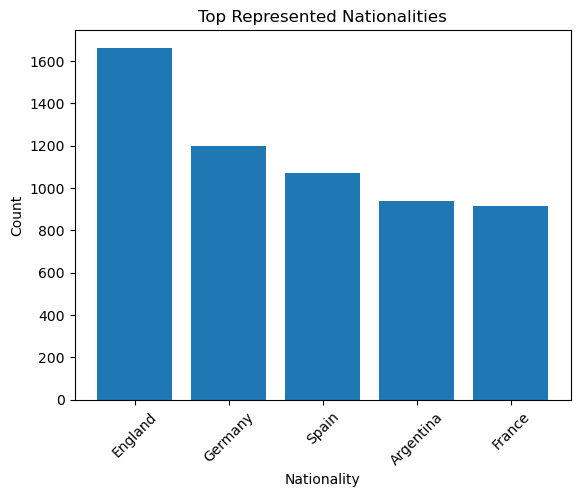

In [43]:
plt.bar(top_nationalities.index, top_nationalities.values)
plt.title("Top Represented Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Which nationalities have the highest overall rating in the dataset?

In [92]:
ratings = df.groupby('Nationality')['Overall'].sum().sort_values(ascending=False)
highest_rated_nationalities = ratings.head(5)
highest_rated_nationalities

Nationality
England      105010
Germany       78986
Spain         74655
Argentina     64110
France        61711
Name: Overall, dtype: int64

In [91]:
df.Nationality.value_counts()

England      1655
Germany      1195
Spain        1071
Argentina     935
France        910
             ... 
Guam            1
Fiji            1
Liberia         1
Mauritius       1
Botswana        1
Name: Nationality, Length: 163, dtype: int64

In [ ]:
df

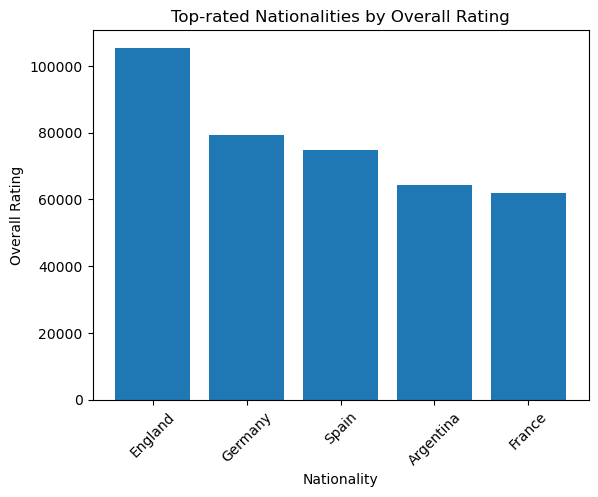

In [47]:
plt.bar(highest_rated_nationalities.index, highest_rated_nationalities.values)
plt.title("Top-rated Nationalities by Overall Rating")
plt.xlabel("Nationality")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()


### What are the most common positions played by the players?

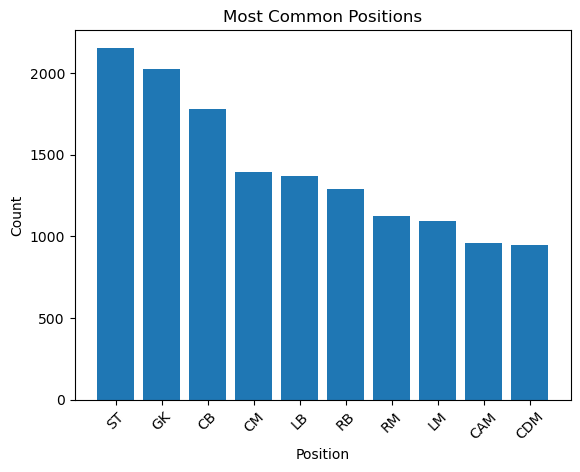

In [48]:
position_counts = df['Position'].value_counts()
top_positions = position_counts.head(10)
plt.bar(top_positions.index, top_positions.values)
plt.title("Most Common Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



### Nationality wise Position

In [97]:
df.query("Position=='LB'").Nationality.value_counts()

England              124
Spain                 81
Germany               79
France                78
Brazil                67
                    ... 
Burkina Faso           1
Guinea Bissau          1
Peru                   1
Equatorial Guinea      1
Philippines            1
Name: Nationality, Length: 94, dtype: int64

In [96]:
df.query("Position=='CAM'").Nationality.value_counts()

Brazil                  81
England                 72
Germany                 62
Spain                   57
France                  50
                        ..
Equatorial Guinea        1
Trinidad & Tobago        1
Belarus                  1
United Arab Emirates     1
Bolivia                  1
Name: Nationality, Length: 85, dtype: int64

In [61]:
Position_Nationality = pd.crosstab(df.Nationality, df.Position)

In [62]:
Position_Nationality

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,4,3,2,0,4,2,0,3,0,1,...,3,2,1,0,0,1,1,2,0,4
Algeria,4,4,4,0,3,5,0,4,3,1,...,1,2,1,3,0,4,0,5,1,8
Andorra,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,3,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venezuela,4,6,1,0,5,4,0,3,1,0,...,6,4,0,0,0,7,2,4,0,12
Wales,4,16,5,0,10,14,0,12,4,1,...,13,7,1,5,0,9,2,2,4,15


In [63]:
Position_Nationality.CAM.max()

81

In [64]:
Position_Nationality[Position_Nationality.CAM ==Position_Nationality.CAM.max()]

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
Brazil,81,66,43,4,18,68,13,69,47,16,...,63,39,15,22,0,23,8,21,0,111


In [65]:
Position_Nationality[Position_Nationality.ST ==Position_Nationality.ST.max()]

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
England,72,161,50,1,196,174,0,129,54,33,...,119,56,37,13,0,115,28,19,15,226


In [66]:
Position_Nationality[Position_Nationality.CF ==Position_Nationality.CF.max()]

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
Japan,28,49,19,16,38,61,2,26,14,12,...,31,15,13,4,3,37,6,5,1,44


In [67]:
Position_Nationality[Position_Nationality.LF ==Position_Nationality.LF.max()]

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
Argentina,46,99,55,2,46,97,0,60,35,25,...,50,37,18,10,2,62,10,29,2,125


In [69]:
Position_Nationality.LF.max()

3

In [49]:
position_nationalities = df.groupby('Position')['Nationality'].value_counts()
for position in df['Position'].unique():
    print("Position:", position)
    print(position_nationalities[position])
    print()


Position: RF
Nationality
Japan        3
Argentina    2
Belgium      2
Austria      1
China PR     1
Finland      1
Germany      1
Italy        1
Spain        1
Sweden       1
Syria        1
Uruguay      1
Name: Nationality, dtype: int64

Position: ST
Nationality
England                226
Argentina              125
Brazil                 111
Spain                  109
France                 106
                      ... 
South Sudan              1
St Kitts Nevis           1
Sudan                    1
Syria                    1
São Tomé & Príncipe      1
Name: Nationality, Length: 114, dtype: int64

Position: LW
Nationality
Italy        32
Argentina    27
England      18
France       16
Brazil       15
             ..
Togo          1
Uganda        1
Ukraine       1
Wales         1
Zimbabwe      1
Name: Nationality, Length: 81, dtype: int64

Position: GK
Nationality
England              174
Germany              164
Spain                116
France               101
Argentina             9

In [ ]:
df

In [ ]:
df.head(30)

### Is there a relationship between a player's age and their overall rating? How does it vary across different positions?

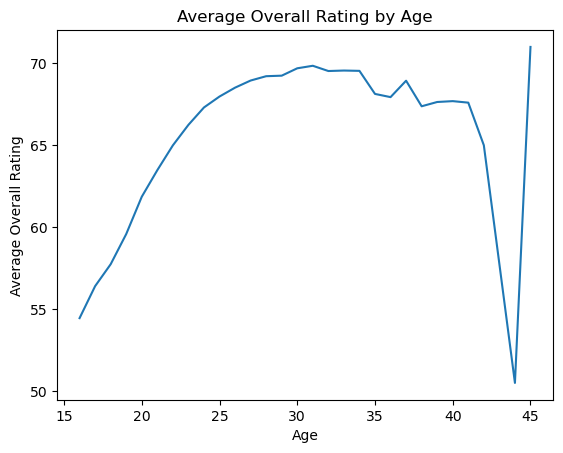

In [50]:
filtered_df = df[['Age', 'Overall', 'Position']]
age_group_ratings = filtered_df.groupby('Age')['Overall'].mean()
plt.plot(age_group_ratings.index, age_group_ratings.values)
plt.title("Average Overall Rating by Age")
plt.xlabel("Age")
plt.ylabel("Average Overall Rating")
plt.show()


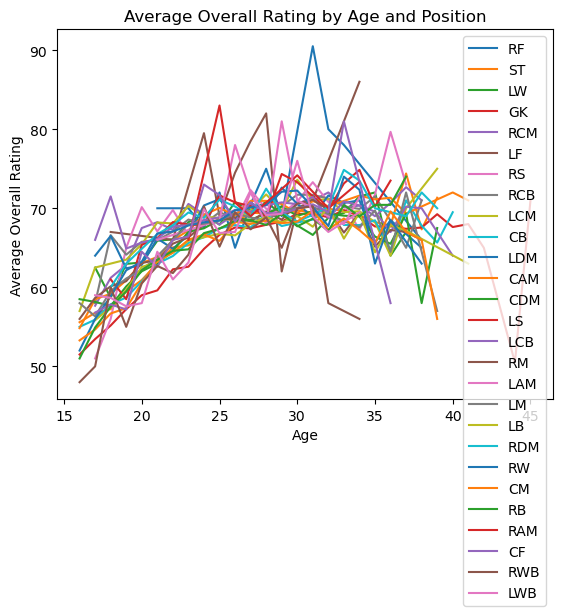

In [51]:
positions = filtered_df['Position'].unique()

for position in positions:
    position_df = filtered_df[filtered_df['Position'] == position]
    position_ratings = position_df.groupby('Age')['Overall'].mean()
    
    plt.plot(position_ratings.index, position_ratings.values, label=position)

plt.title("Average Overall Rating by Age and Position")
plt.xlabel("Age")
plt.ylabel("Average Overall Rating")
plt.legend()
plt.show()


### Does a player's international reputation impact their overall rating or value? How does it vary across different nationalities?

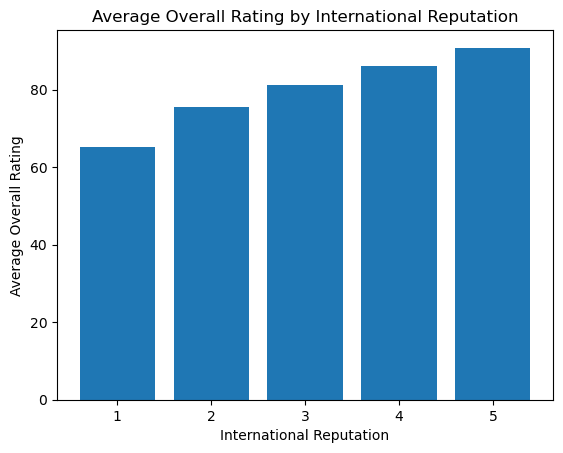

In [52]:
filtered_df1 = df[['International Reputation', 'Overall', 'Value', 'Nationality']]
reputation_ratings = filtered_df1.groupby('International Reputation')['Overall'].mean()

plt.bar(reputation_ratings.index, reputation_ratings.values)
plt.title("Average Overall Rating by International Reputation")
plt.xlabel("International Reputation")
plt.ylabel("Average Overall Rating")
plt.show()


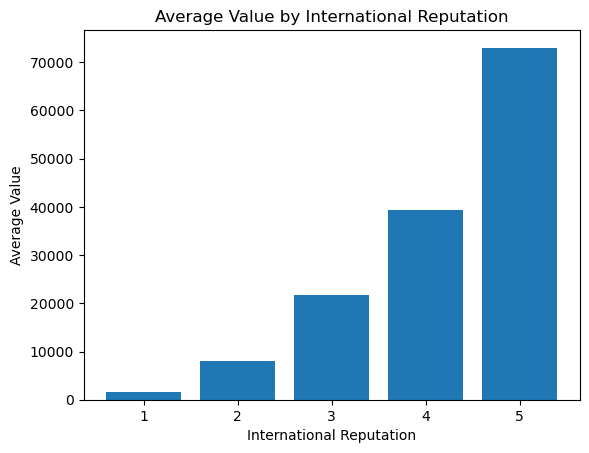

In [53]:
reputation_values = filtered_df1.groupby('International Reputation')['Value'].mean()

plt.bar(reputation_values.index, reputation_values.values)
plt.title("Average Value by International Reputation")
plt.xlabel("International Reputation")
plt.ylabel("Average Value")
plt.show()


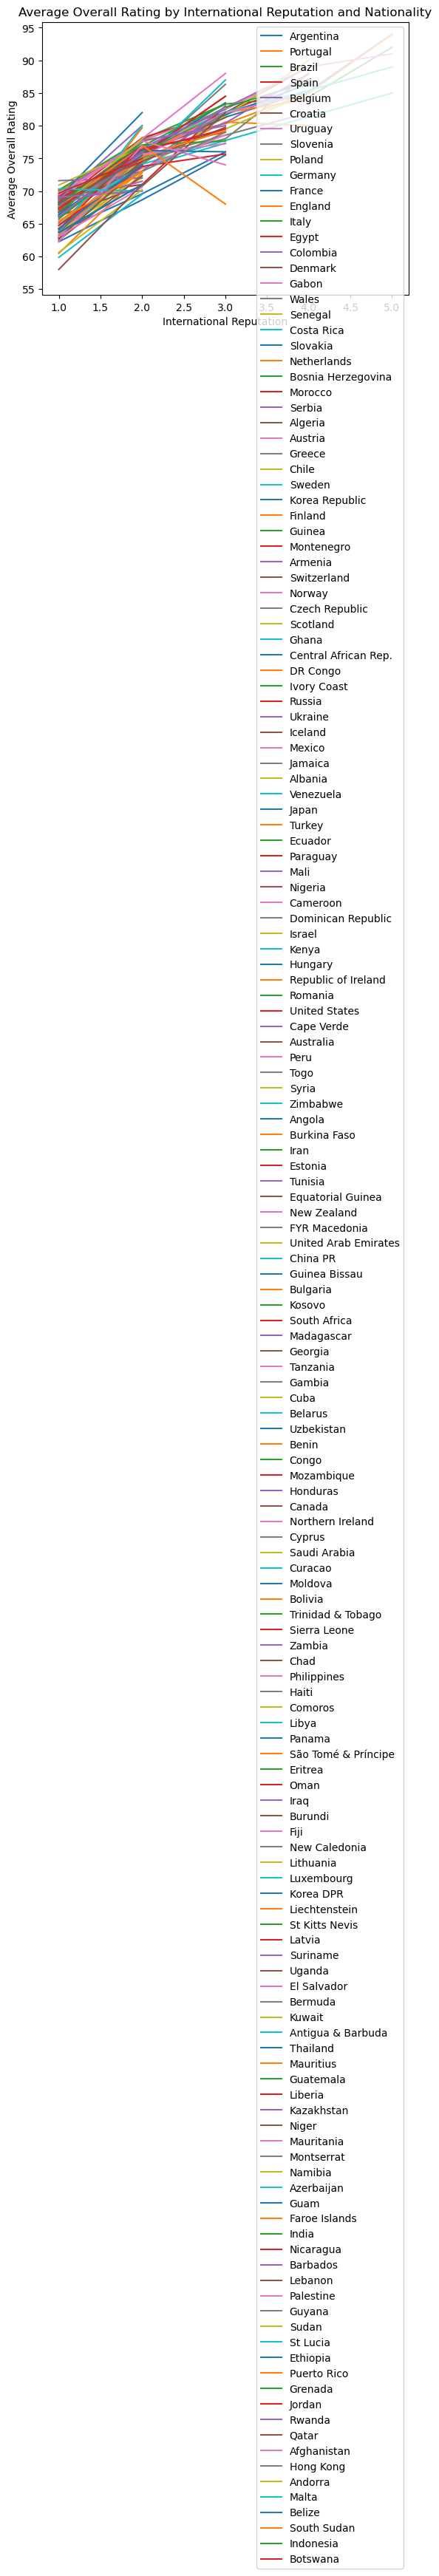

In [54]:
nationalities = filtered_df1['Nationality'].unique()

for nationality in nationalities:
    nationality_df = filtered_df1[filtered_df1['Nationality'] == nationality]
    nationality_ratings = nationality_df.groupby('International Reputation')['Overall'].mean()
    
    plt.plot(nationality_ratings.index, nationality_ratings.values, label=nationality)

plt.title("Average Overall Rating by International Reputation and Nationality")
plt.xlabel("International Reputation")
plt.ylabel("Average Overall Rating")
plt.legend()
plt.show()


### How does a player's skill moves rating relate to their overall rating and performance on the field?

In [55]:
filtered_df2 = df[['Skill Moves', 'Overall']]


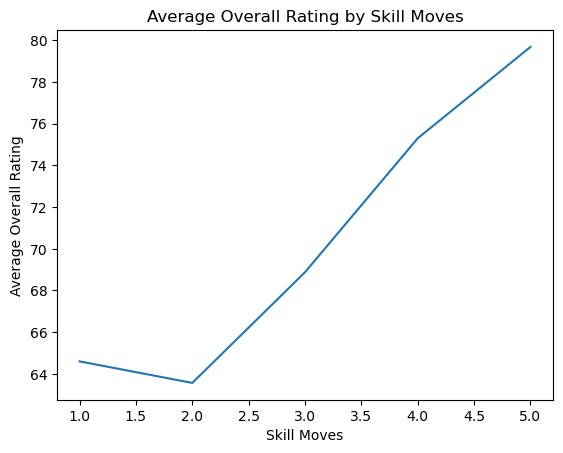

In [56]:
overall_ratings = filtered_df2.groupby('Skill Moves')['Overall'].mean()

plt.plot(overall_ratings.index, overall_ratings.values)
plt.title("Average Overall Rating by Skill Moves")
plt.xlabel("Skill Moves")
plt.ylabel("Average Overall Rating")
plt.show()


### What is the distribution of player overall ratings in the dataset? Are there any outliers or patterns?

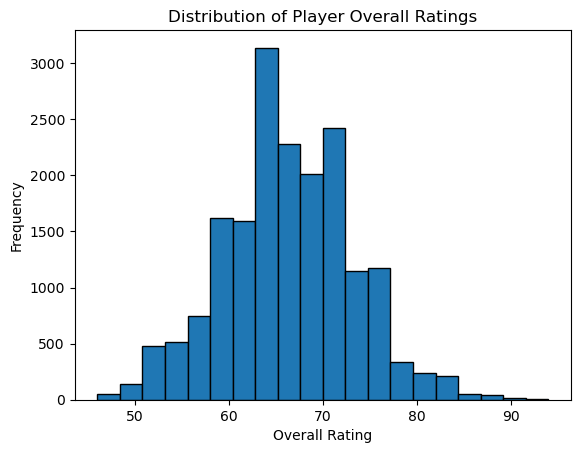

In [57]:
overall_ratings = df['Overall']
plt.hist(overall_ratings, bins=20, edgecolor='black')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


In [58]:
rating_mean = overall_ratings.mean()
rating_median = overall_ratings.median()
rating_std = overall_ratings.std()
rating_min = overall_ratings.min()
rating_max = overall_ratings.max()

print("Mean:", rating_mean)
print("Median:", rating_median)
print("Standard Deviation:", rating_std)
print("Minimum Rating:", rating_min)
print("Maximum Rating:", rating_max)


Mean: 66.23869940132916
Median: 66.0
Standard Deviation: 6.908929611882886
Minimum Rating: 46
Maximum Rating: 94


### What is the average overall rating and potential for players in different positions? Are there any positions that consistently have higher-rated players or higher potential?

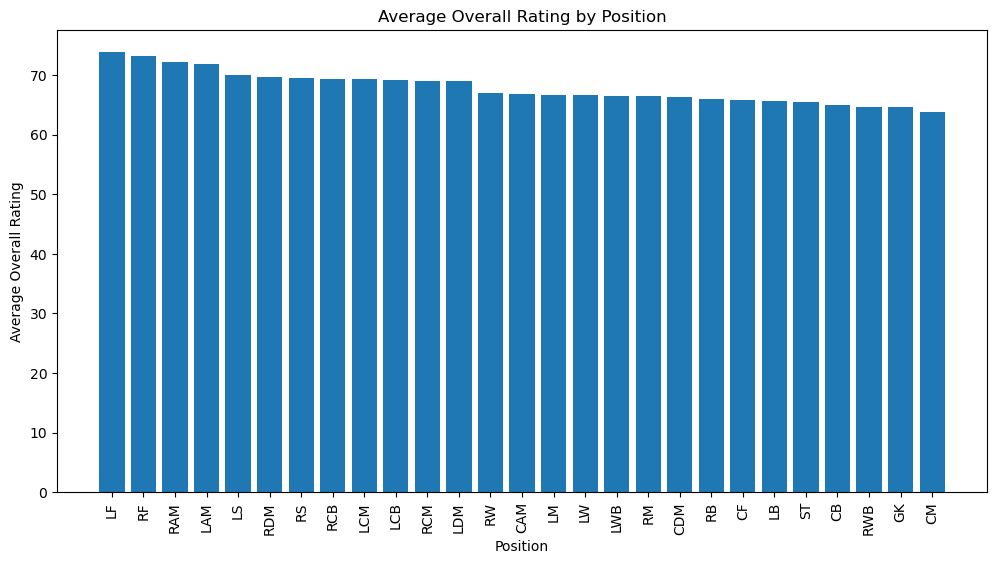

In [59]:
position_ratings = df.groupby('Position')['Overall', 'Potential'].mean().reset_index()
position_ratings = position_ratings.sort_values(by='Overall', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(position_ratings['Position'], position_ratings['Overall'])
plt.title('Average Overall Rating by Position')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=90)
plt.show()


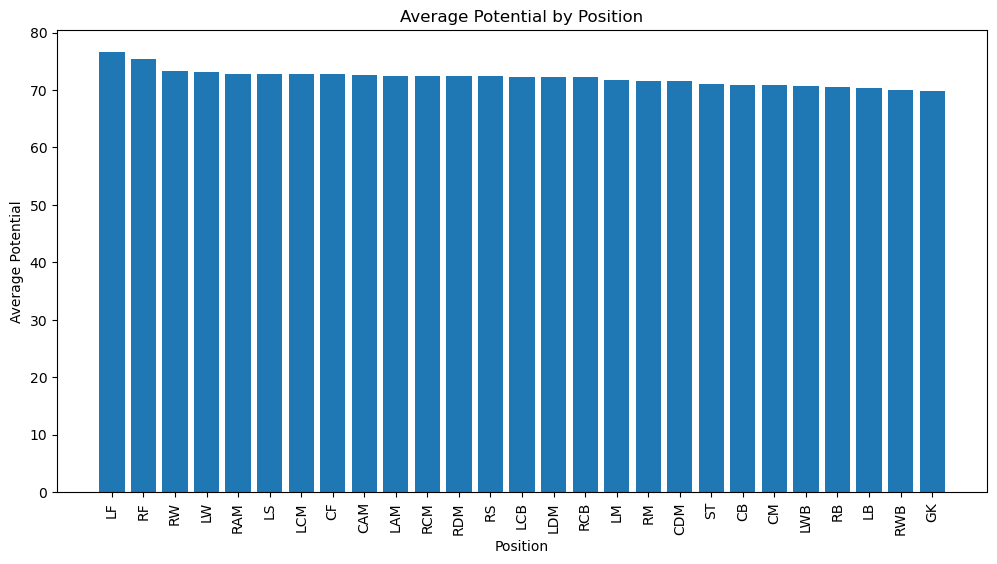

In [60]:
position_ratings = position_ratings.sort_values(by='Potential', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(position_ratings['Position'], position_ratings['Potential'])
plt.title('Average Potential by Position')
plt.xlabel('Position')
plt.ylabel('Average Potential')
plt.xticks(rotation=90)
plt.show()


### How does the release clause vary across different overall rating ranges?

In [100]:
bins = [0, 60, 70, 80, 90, 100]
labels = ['0-60', '61-70', '71-80', '81-90', '91-100']
df['Overall Range'] = pd.cut(df['Overall'], bins=bins, labels=labels)


In [101]:
mean_release_clause = df.groupby('Overall Range')['Release Clause'].mean()


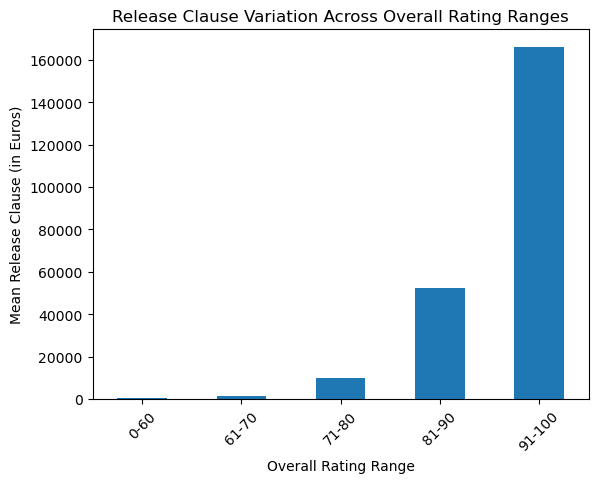

In [102]:
mean_release_clause.plot(kind='bar')
plt.xlabel('Overall Rating Range')
plt.ylabel('Mean Release Clause (in Euros)')
plt.title('Release Clause Variation Across Overall Rating Ranges')
plt.xticks(rotation=45)
plt.show()



### Which foot (left or right) is preferred by most players?

In [107]:
foot_counts = df['Preferred Foot'].value_counts()
foot_counts

Right    13748
Left      4159
Name: Preferred Foot, dtype: int64

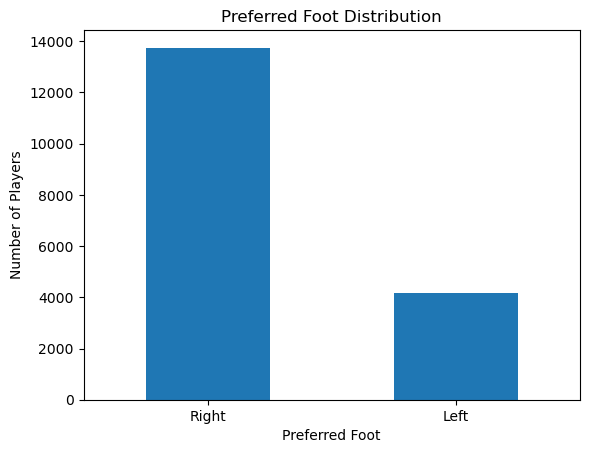

In [104]:
foot_counts.plot(kind='bar')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.title('Preferred Foot Distribution')
plt.xticks(rotation=0)
plt.show()


### What is the distribution of players' market values?

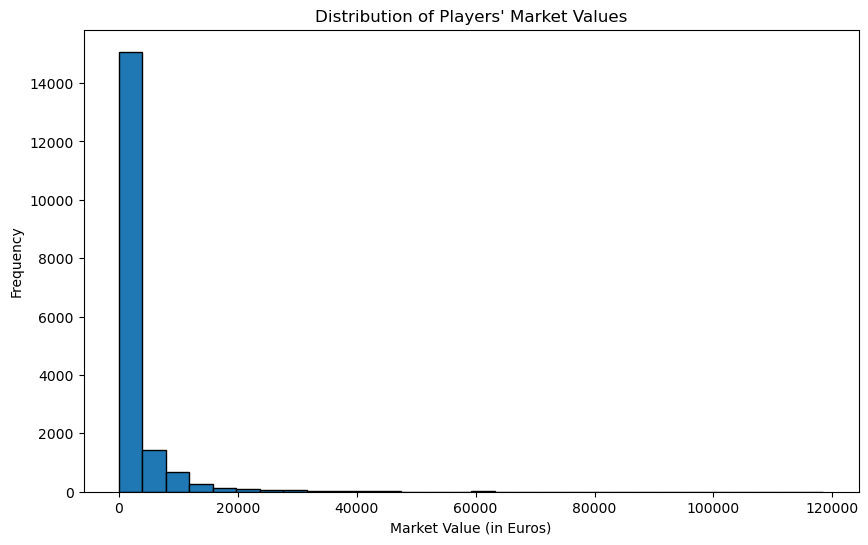

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=30, edgecolor='k')
plt.xlabel('Market Value (in Euros)')
plt.ylabel('Frequency')
plt.title('Distribution of Players\' Market Values')
plt.show()


### Is there a correlation between a player's age and their market value?

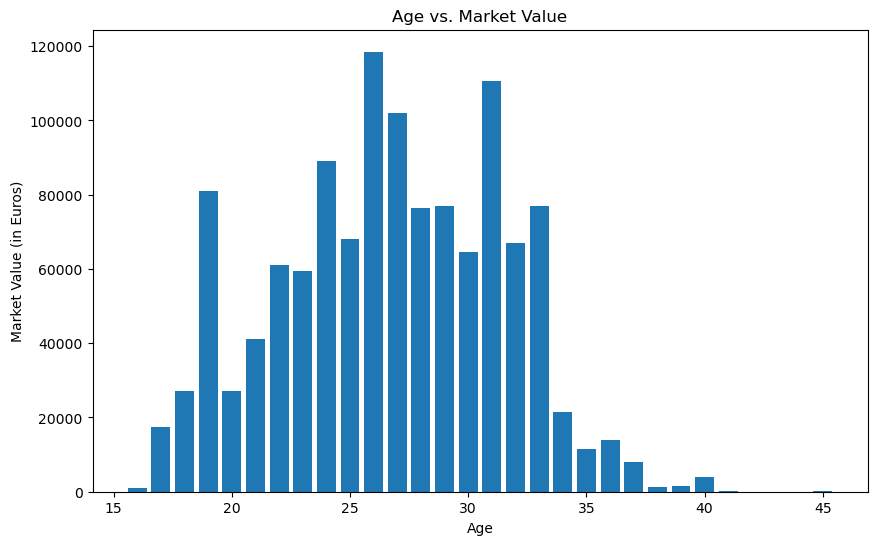

In [112]:
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Value'])
plt.xlabel('Age')
plt.ylabel('Market Value (in Euros)')
plt.title('Age vs. Market Value')
plt.show()

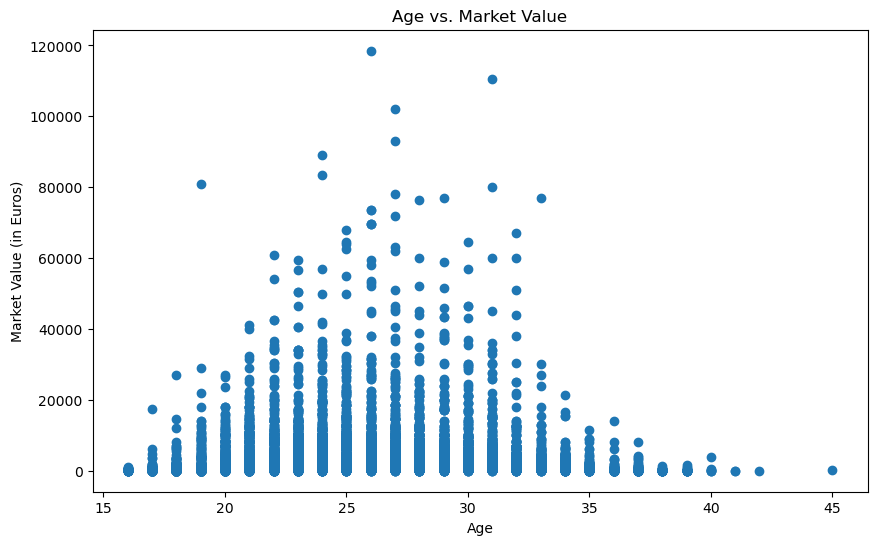

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Value'])
plt.xlabel('Age')
plt.ylabel('Market Value (in Euros)')
plt.title('Age vs. Market Value')
plt.show()


In [111]:
correlation = df['Age'].corr(df['Value'])

correlation

0.0784520355321399

In [113]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Position,Joined,Contract_Valid_Until,Height,Weight,Release Clause,Year,Month,Wage_limit,Overall Range
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,...,RF,2004,2021-01-01,5.583333,159.0,226500.0,2021,1.0,Too High,91-100
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,...,ST,2018,2022-01-01,6.166667,183.0,127100.0,2022,1.0,Too High,91-100
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,...,LW,2017,2022-01-01,5.750000,150.0,228100.0,2022,1.0,High,91-100
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,...,GK,2011,2020-01-01,6.333333,168.0,138600.0,2020,1.0,High,91-100
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,...,RCM,2015,2023-01-01,5.916667,154.0,196400.0,2023,1.0,Too High,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,...,CM,2017,2019-01-01,5.750000,134.0,143.0,2019,1.0,Too Low,0-60
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,...,ST,2018,2020-01-01,6.250000,170.0,113.0,2020,1.0,Too Low,0-60
18204,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,...,ST,2017,2021-01-01,5.666667,148.0,165.0,2021,1.0,Too Low,0-60
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,...,RW,2018,2019-01-01,5.833333,154.0,143.0,2019,1.0,Too Low,0-60


### Which positions have the highest average overall ratings?

In [117]:
positionvsrating = df.groupby('Position')['Overall'].mean().sort_values(ascending=False)

<Axes: xlabel='Position'>

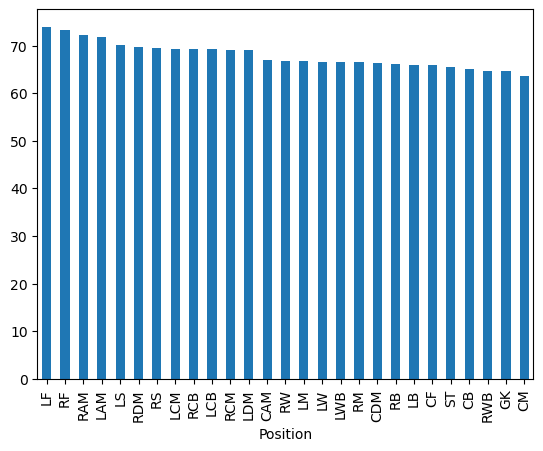

In [118]:
positionvsrating.plot.bar()

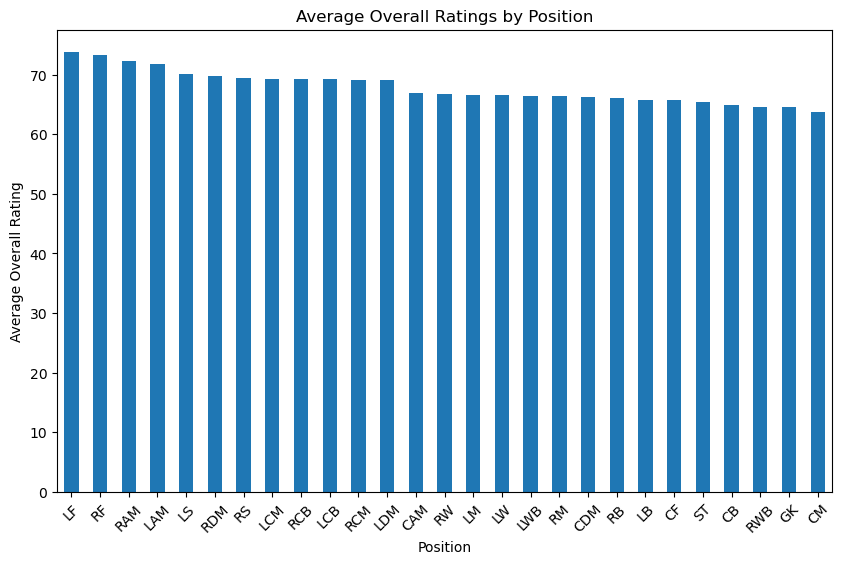

In [144]:
plt.figure(figsize=(10, 6))
positionvsrating.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Ratings by Position')
plt.xticks(rotation=45)
plt.show()


In [ ]:
RCB,LCB, LWB,RB, LB, CB, RWB

### How does the potential rating vary across different age groups?

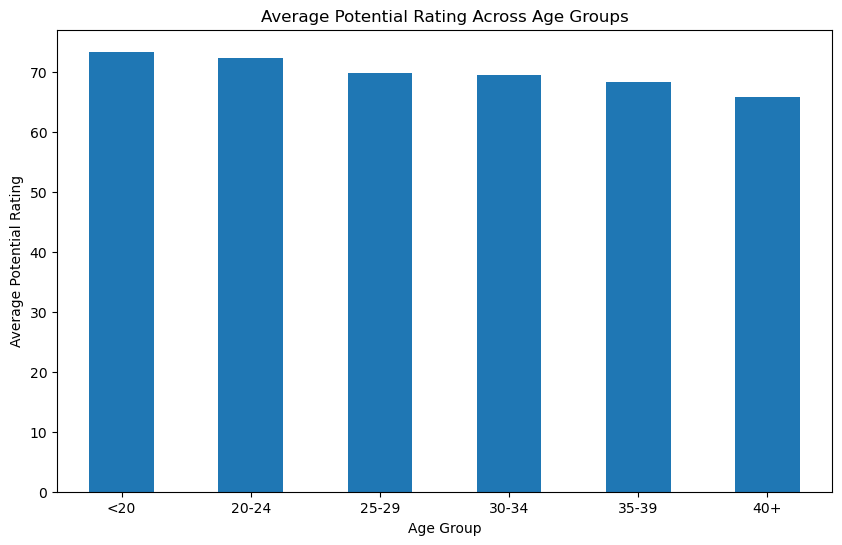

In [131]:
bins = [0, 20, 25, 30, 35, 40, 100]
labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_avg_potential = df.groupby('Age Group')['Potential'].mean()
plt.figure(figsize=(10, 6))
age_group_avg_potential.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Potential Rating')
plt.title('Average Potential Rating Across Age Groups')
plt.xticks(rotation=0)
plt.show()


In [135]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Contract_Valid_Until,Height,Weight,Release Clause,Year,Month,Wage_limit,Overall Range,Age Group,Value_Release_Diff
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,...,2021-01-01,5.583333,159.0,226500.0,2021,1.0,Too High,91-100,30-34,-116000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,...,2022-01-01,6.166667,183.0,127100.0,2022,1.0,Too High,91-100,30-34,-50100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,...,2022-01-01,5.750000,150.0,228100.0,2022,1.0,High,91-100,25-29,-109600.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,...,2020-01-01,6.333333,168.0,138600.0,2020,1.0,High,91-100,25-29,-66600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,...,2023-01-01,5.916667,154.0,196400.0,2023,1.0,Too High,91-100,25-29,-94400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,...,2019-01-01,5.750000,134.0,143.0,2019,1.0,Too Low,0-60,<20,-83.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,...,2020-01-01,6.250000,170.0,113.0,2020,1.0,Too Low,0-60,<20,-53.0
18204,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,...,2021-01-01,5.666667,148.0,165.0,2021,1.0,Too Low,0-60,<20,-105.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,...,2019-01-01,5.833333,154.0,143.0,2019,1.0,Too Low,0-60,<20,-83.0


In [132]:
df['Value_Release_Diff'] = df['Value'] - df['Release Clause']

In [136]:
threshold = 100000
significant_diff_players = df[df['Value_Release_Diff'] > threshold]


In [138]:
average_overall_rating = significant_diff_players['Overall'].mean()
print("Average overall rating of players with significant value-release clause difference:", average_overall_rating)


Average overall rating of players with significant value-release clause difference: nan


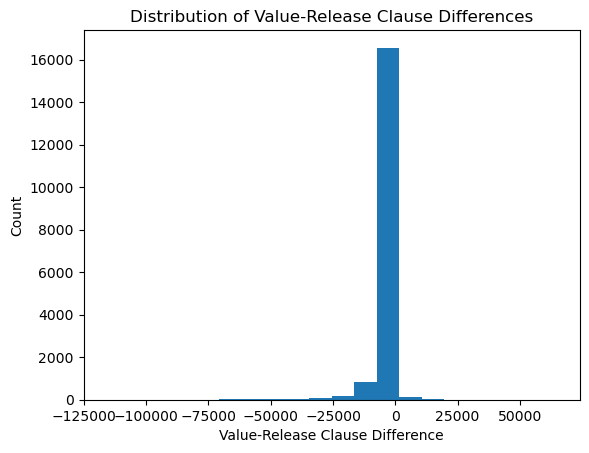

In [139]:
plt.hist(df['Value_Release_Diff'], bins=20)
plt.xlabel('Value-Release Clause Difference')
plt.ylabel('Count')
plt.title('Distribution of Value-Release Clause Differences')
plt.show()


### I want to get the the top 5 countries where the players have overall rating greater than 75 whose position is CAM 

In [140]:
filtered_df = df[(df['Overall'] > 75) & (df['Position'] == 'CAM')]


In [141]:
country_counts = filtered_df['Nationality'].value_counts()


In [142]:
top_5_countries = country_counts.head(5)


In [143]:
print("Top 5 countries with players having an overall rating > 75 and position as CAM:")
print(top_5_countries)



Top 5 countries with players having an overall rating > 75 and position as CAM:
Argentina    12
Brazil       10
Spain         8
Germany       7
France        6
Name: Nationality, dtype: int64


### I want to get the the top 5 countries and clubs whose defends is strong

In [167]:
positions = ['RCB', 'LCB', 'LWB', 'RB', 'LB', 'CB', 'RWB']
filtered_df = df[(df['Overall'] >= 75) & (df['Position'].isin(positions))]
country_counts = filtered_df['Nationality'].value_counts()
top_5_countries = country_counts.head(5)
top_5_countries

Brazil     77
Spain      73
France     59
Germany    41
England    39
Name: Nationality, dtype: int64

In [164]:
positions1 = ['RCB', 'LCB', 'LWB', 'RB', 'LB', 'CB', 'RWB']
filtered_df1 = df[(df['Overall'] >= 75) & (df['Position'].isin(positions))]
club_counts1 = filtered_df1['Club'].value_counts()
top_5_clubs1 = club_counts1.head(5)

top_5_clubs1

Manchester City        9
Chelsea                8
Manchester United      8
Bayer 04 Leverkusen    8
Arsenal                8
Name: Club, dtype: int64

In [166]:
filtered_df1.Position.unique()

array(['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB'], dtype=object)

In [165]:
filtered_df1.tail(30)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Contract_Valid_Until,Height,Weight,Release Clause,Year,Month,Wage_limit,Overall Range,Age Group,Value_Release_Diff
1961,Mexer,29,Mozambique,75,75,Stade Rennais FC,5000.0,28.0,Right,2.0,...,2019-01-01,6.166667,174.0,9500.000000,2019,1.0,Low,71-80,25-29,-4500.000000
1963,J. Figal,24,Argentina,75,81,Independiente,8000.0,15.0,Right,1.0,...,2022-01-01,5.916667,141.0,12800.000000,2022,1.0,Too Low,71-80,20-24,-4800.000000
1965,F. Helander,25,Sweden,75,77,Bologna,7000.0,25.0,Left,1.0,...,2020-01-01,6.333333,185.0,12400.000000,2020,1.0,Low,71-80,20-24,-5400.000000
1970,R. Bensebaini,23,Algeria,75,79,Stade Rennais FC,7000.0,23.0,Left,2.0,...,2020-01-01,6.083333,165.0,13800.000000,2020,1.0,Low,71-80,20-24,-6800.000000
1974,M. Doherty,26,Republic of Ireland,75,78,Wolverhampton Wanderers,7000.0,52.0,Right,1.0,...,2021-01-01,6.000000,196.0,13800.000000,2021,1.0,Below_Avg,71-80,25-29,-6800.000000
1977,S. Ward,32,Republic of Ireland,75,75,Burnley,3700.0,42.0,Left,2.0,...,2019-01-01,6.083333,176.0,7000.000000,2019,1.0,Low,71-80,30-34,-3300.000000
1979,S. Francis,33,England,75,75,Bournemouth,2700.0,49.0,Right,1.0,...,2020-01-01,6.166667,198.0,5100.000000,2020,1.0,Low,71-80,30-34,-2400.000000
1980,Lafortiscinho,26,Brazil,75,75,Botafogo,5500.0,20.0,Left,1.0,...,2021-01-01,5.833333,165.0,10500.000000,2021,1.0,Too Low,71-80,25-29,-5000.000000
1983,D. Boyata,27,Belgium,75,77,Celtic,6500.0,42.0,Right,1.0,...,2019-01-01,6.166667,190.0,12200.000000,2019,1.0,Low,71-80,25-29,-5700.000000
1990,C. Mbemba,23,DR Congo,75,80,FC Porto,7500.0,10.0,Right,1.0,...,2022-01-01,6.000000,181.0,15600.000000,2022,1.0,Too Low,71-80,20-24,-8100.000000
